# <font color = 'orange'> Importando Bibliotecas </font>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,5)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <font color = 'orange'> Briefing do case </font>

<img src="images/spotify.png" alt="spotify" width="400" height="150">



***Quais atributos fazem uma musica virar um Hit? A partir de dados coletados do Spotify entre 2000 e 2010, conseguimos montar um modelo que pode prever se uma nova música lançada vai ser <font color ="green">"Hit"</font> ou vai <font color = "red">Floppar? </font>***

***

# <font color = 'orange'> Resumo dos Dados </font>

- **track:** Nome da musica.

- **artist:** Nome do artista.

- **uri:** identificador unico da musica.

- **danceability:** A "danceability",descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançante e 1,0 é mais dançante.
- **energy: Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente,** as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach tem pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

- **key:** O tom geral estimado para cada musica. Os inteiros mapeiam para cada nota padrão.. E.X. 0 = C, 1 = C?/D?, 2 = D, e assim por diante. Se nenhuma chave for determinada, o valor é -1.

- **loudness:** O volume geral de uma faixa em decibéis (dB). Os valores de sonoridade são calculados em toda a trilha e são úteis para comparar a sonoridade relativa das trilhas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

- **mode:** Modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

- **speechiness:** A fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, em seções ou em camadas, incluindo casos como música rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala. 

- **acousticness:** Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica. 

- **instrumentalness:** Prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente “vocais”. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0. 

- **liveness:** Detecta a presença de um público na gravação. Valores de vivacidade mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo. Um valor acima de 0,8 fornece grande probabilidade de que a faixa esteja ao vivo.

- **valence:** Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, com raiva).

- **tempo:** O tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo.

- **duration_ms:**  Duração da musica em ms.

- **time_signature:** Uma estimativa de fórmula de compasso geral de uma faixa. A fórmula de compasso (medidor) é uma convenção notacional para especificar quantas batidas existem em cada barra (ou compasso).

- **chorus_hit:** Esta é a melhor estimativa do autor de quando o refrão começaria para a faixa. É o carimbo de data / hora do início da terceira seção da faixa. Este recurso foi extraído dos dados recebidos pela chamada de API para análise de áudio dessa faixa específica.

- **sections:** O número de seções de uma trilha específica. Este recurso foi extraído dos dados recebidos pela chamada de API para análise de áudio dessa faixa específica.

- **target:** A variável de destino da trilha. Pode ser '0' ou '1'. '1' implica que esta música apareceu na lista semanal (publicada pela Billboards) das faixas do Hot-100 naquela década pelo menos uma vez e, portanto, é um 'hit'. '0' implica que a faixa é um 'flop'.

      A condição do autor de uma faixa sendo 'flop' é a seguinte:

        - A faixa não deve constar da lista de 'hits' dessa década.
        - O artista da faixa não deve constar da lista de 'hits' dessa década.
        - A faixa deve pertencer a um gênero que possa ser considerado não mainstream e / ou vanguardista.
        - O gênero da faixa não deve ter uma música na lista de 'hits'.
        - A pista deve ter 'US' como um de seus mercados.


# <font color = 'orange'> Ánalise Inicial dos Dados </font>

In [131]:
#importando dados CSV
dados_anos_2000 = pd.read_csv('dataset-of-00s.csv')
dados_anos_2010 = pd.read_csv('dataset-of-10s.csv')

In [132]:
#verificando primeiras 5 linhas do Dataset
dados_anos_2000.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [133]:
#Tamanho e numero de colunas
dados_anos_2000.shape

(5872, 19)

In [134]:
#tipos de dados no dataset
dados_anos_2000.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [135]:
#Colunas no dataset
dados_anos_2000.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [136]:
results_drake = df_union.loc[df_union['artist'] == 'Drake']

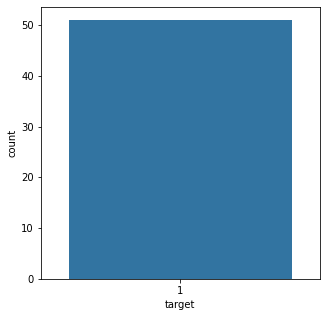

In [137]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.countplot(data=results_drake,x='target');

***
**Para ter um maior insumo de informações, vamos juntar os dados das musicas dos anos 2000 e 2010**
***

In [138]:
#União dos dos datasets
df_union = pd.concat([dados_anos_2000,dados_anos_2010])

In [139]:
df_union.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [140]:
df_union.shape

(12270, 19)

In [141]:
#Verificando se existem dados nulos no dataset
pd.isnull(df_union).sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

***
O campo **'uri'** não possui muito valor para nossa análise, já que não teremos mais nenhum cruzamento de dados. Portando iremos removelo.
***

In [142]:
#Removendo a coluna uri
df_union.drop(['uri'],axis=1,inplace=True)

In [143]:
df_union.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# <font color = 'orange'> Ánalise Descritiva </font>

In [144]:
#Estatisticas descritivas gerais do nosso dataset
df_union['danceability'].mean()

0.5560876120619401

In [145]:
#Usando o Describe pra trazer todas as estatisticas principais para descrever o dataset
df_union.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,1.227000e+04,12270.000000,12270.000000,12270.000000,12270.00000
mean,0.556088,0.680560,5.280114,-7.522540,0.645314,0.095310,0.215706,0.158413,0.196432,0.462172,121.999324,2.469773e+05,3.922820,40.887651,10.670823,0.50000
std,0.190986,0.239687,3.586004,5.172085,0.478438,0.096203,0.296671,0.310655,0.164153,0.250751,30.008028,1.151325e+05,0.390605,19.895327,4.841202,0.50002
min,0.058800,0.000251,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.016700,0.000000,39.369000,1.592000e+04,0.000000,0.000000,1.000000,0.00000
25%,0.432000,0.548000,2.000000,-8.375000,0.000000,0.037325,0.006072,0.000000,0.095300,0.258000,97.699250,1.993870e+05,4.000000,27.824750,8.000000,0.00000
50%,0.573000,0.727000,5.000000,-6.069500,1.000000,0.055100,0.063200,0.000019,0.128000,0.455000,120.082500,2.288465e+05,4.000000,36.175345,10.000000,0.50000
75%,0.697000,0.871000,8.000000,-4.585000,1.000000,0.109000,0.312000,0.051150,0.257000,0.659000,141.316000,2.692170e+05,4.000000,48.157528,12.000000,1.00000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.987000,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000,1.00000


In [146]:
# Descrevendo média para uma coluna
df_union['danceability'].mean()

0.5560876120619401

In [147]:
# Utilizando o método Describe para ter acesso as principais estatisticas descritivas
df_union.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,12270.000000,1.227000e+04,12270.000000,12270.000000,12270.000000,12270.00000
mean,0.556088,0.680560,5.280114,-7.522540,0.645314,0.095310,0.215706,0.158413,0.196432,0.462172,121.999324,2.469773e+05,3.922820,40.887651,10.670823,0.50000
std,0.190986,0.239687,3.586004,5.172085,0.478438,0.096203,0.296671,0.310655,0.164153,0.250751,30.008028,1.151325e+05,0.390605,19.895327,4.841202,0.50002
min,0.058800,0.000251,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.016700,0.000000,39.369000,1.592000e+04,0.000000,0.000000,1.000000,0.00000
25%,0.432000,0.548000,2.000000,-8.375000,0.000000,0.037325,0.006072,0.000000,0.095300,0.258000,97.699250,1.993870e+05,4.000000,27.824750,8.000000,0.00000
50%,0.573000,0.727000,5.000000,-6.069500,1.000000,0.055100,0.063200,0.000019,0.128000,0.455000,120.082500,2.288465e+05,4.000000,36.175345,10.000000,0.50000
75%,0.697000,0.871000,8.000000,-4.585000,1.000000,0.109000,0.312000,0.051150,0.257000,0.659000,141.316000,2.692170e+05,4.000000,48.157528,12.000000,1.00000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.987000,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000,1.00000


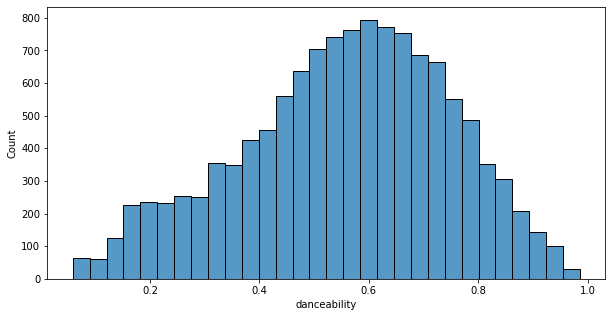

In [148]:
#Plotando um histograma para ter uma analise visual das variaveis
sns.histplot(data=df_union,x='danceability',bins=30);

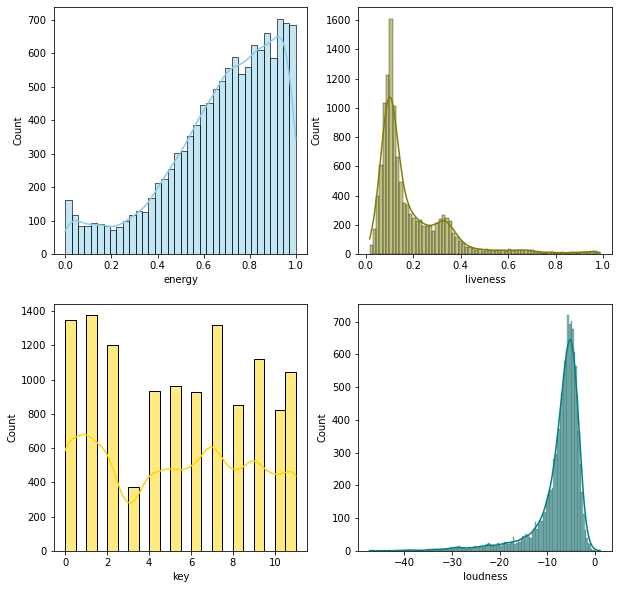

In [149]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df_union, x="energy", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_union, x="liveness", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_union, x="key", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_union, x="loudness", kde=True, color="teal", ax=axs[1, 1])


plt.show()



# <font color = 'orange'> Enferência Estatistica </font>

## <font color = 'orange'>O que é Arvore de Decisão?</font>

<img src="images/dog.jpeg" alt="dog" width="400" height="150" >


As árvores de decisão representam uma das formas mais simplificadas de um sistema de suporte à decisão. É um método estatístico, de aprendizagem supervisionada, podendo ser utilizado em problemas de classificação e na realização de previsões.
A partir de um conjunto de dados existente, o método cria uma representação do conhecimento ali embutido, em formato de árvore. Os nós da árvore são criados a partir das características (features) do conjunto de dados. Obviamente existe uma série de cálculos matemáticos envolvidos na escolha de uma determinada feature como nó em uma determinada posição da árvore. 

http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/indexf23d.html?id=199

<img src="images/tree.png" alt="dog" width="400" height="150" >


## <font color = 'orange'>O que é uma Random Forest?</font>


O nome Random Forest faz todo o sentido quando se pensa em seu funcionamento: random significa aleatório, e denota o comportamento do algoritmo ao selecionar subconjuntos de features e montar mini árvores de decisão. Forest significa floresta, já que são geradas várias árvores de decisão.

Ou seja, basicamente, o algoritmo possui 4 passos:
1. Seleção aleatória de algumas features
2. Seleção da feature mais adequada para a posição de nó raiz
3. Geração dos nós filhos
4. Repete os passos acima até que se atinja a quantidade de árvores desejada

Depois que o modelo é gerado, as previsões são feitas a partir de “votações”. Cada mini árvore toma uma decisão a partir dos dados apresentados. A decisão mais votada é a resposta do algoritmo.

<img src="images/multi_tree.png" alt="dog" width="700" height="400" >


## <font color = 'orange'>Implementando Random Forest em Python</font>


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [151]:
features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

X = df_union[features]
y = df_union['target']

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [153]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1226,  264],
       [ 204, 1374]])

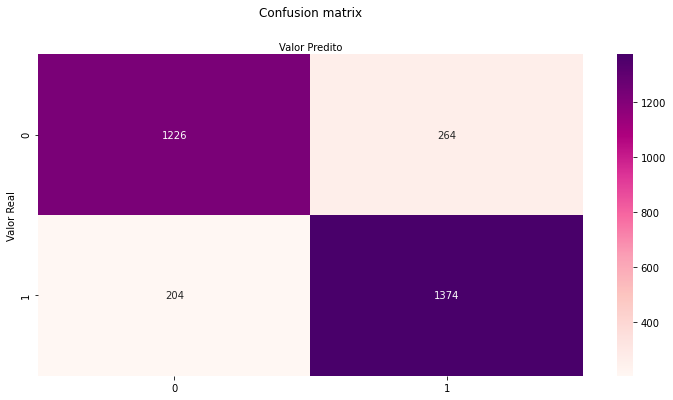

In [154]:
#Plotando a Confusion Matrix para melhor visualização
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()

In [155]:
# Criando um dataframe com a importancia de cada feature no Dataset
all_songs_feat = RF.feature_importances_
df_features = pd.DataFrame(features)
df_importancia = pd.DataFrame(all_songs_feat)
df_import_variavel = pd.concat([df_features, df_importancia], axis = 1)
df_import_variavel.columns = ['Variavel', 'Importancia']
df_import_variavel = df_import_variavel.set_index('Variavel')
df_import_variavel = df_import_variavel.sort_values(by=['Importancia'], ascending = False)


In [156]:
all_songs_feat_vars

,Importancia
Variavel,
instrumentalness,0.230327
danceability,0.112098
loudness,0.111609
acousticness,0.096108
energy,0.086780
duration_ms,0.075006
valence,0.059137
speechiness,0.047364
tempo,0.039886


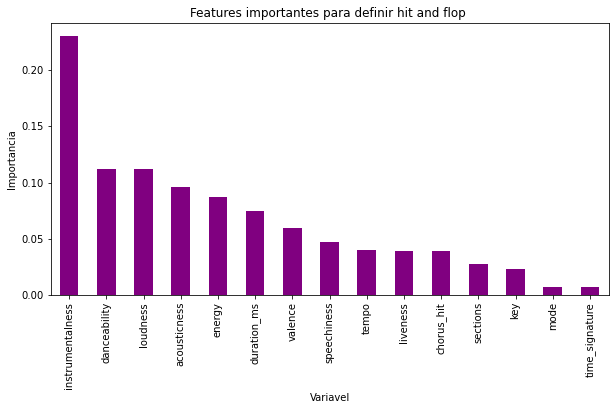

In [157]:
all_songs_feat_vars.plot(kind='bar', color = "purple", title = "Features importantes para definir hit and flop ", legend = None)
plt.ylabel('Importancia')
plt.show()

In [158]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_x1pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.847457627118644
Precision: 0.8388278388278388
Recall: 0.870722433460076
